In [1]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
ls

drive/  sample_data/


In [3]:
# installing pytorch
!pip install torch torchvision

In [4]:
# uninstalling the old version and installing the new version

!pip uninstall -y Pillow
!pip install Pillow==9.5.0

Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Successfully uninstalled Pillow-9.5.0
  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)


In [5]:
# importing necessaries libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torchvision import transforms, models

In [6]:
vgg = models.vgg19(pretrained=True).features

for param in vgg.parameters():
    param.requires_grad_(False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 85.6MB/s]


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Cuda Available: ', torch.cuda.is_available())
vgg.to(device)

Cuda Available:  False


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [8]:
# defining a fucntion to load the content and style images

def load_image(path, max_size=400, shape=None):
    image = Image.open(path).convert('RGB')

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    image = in_transform(image)[:3,:,:].unsqueeze(0)

    return image



In [9]:
!pip install Pillow==9.4.0
#load content image
content = load_image('drive/My Drive/Colab Notebooks/rorygilmore1.jpg').to(device)

#load style image
style = load_image('drive/My Drive/Colab Notebooks/vangogh1.jpg').to(device)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0


In [10]:
# function to convert image from it's normalised form back to regular form

def imconvert(tensor):
    tensor = tensor.cpu().clone().detach()
    tensor = tensor.numpy().squeeze()
    tensor = tensor.transpose(1,2,0)
    tensor = tensor * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    tensor = tensor.clip(0,1)
    return tensor



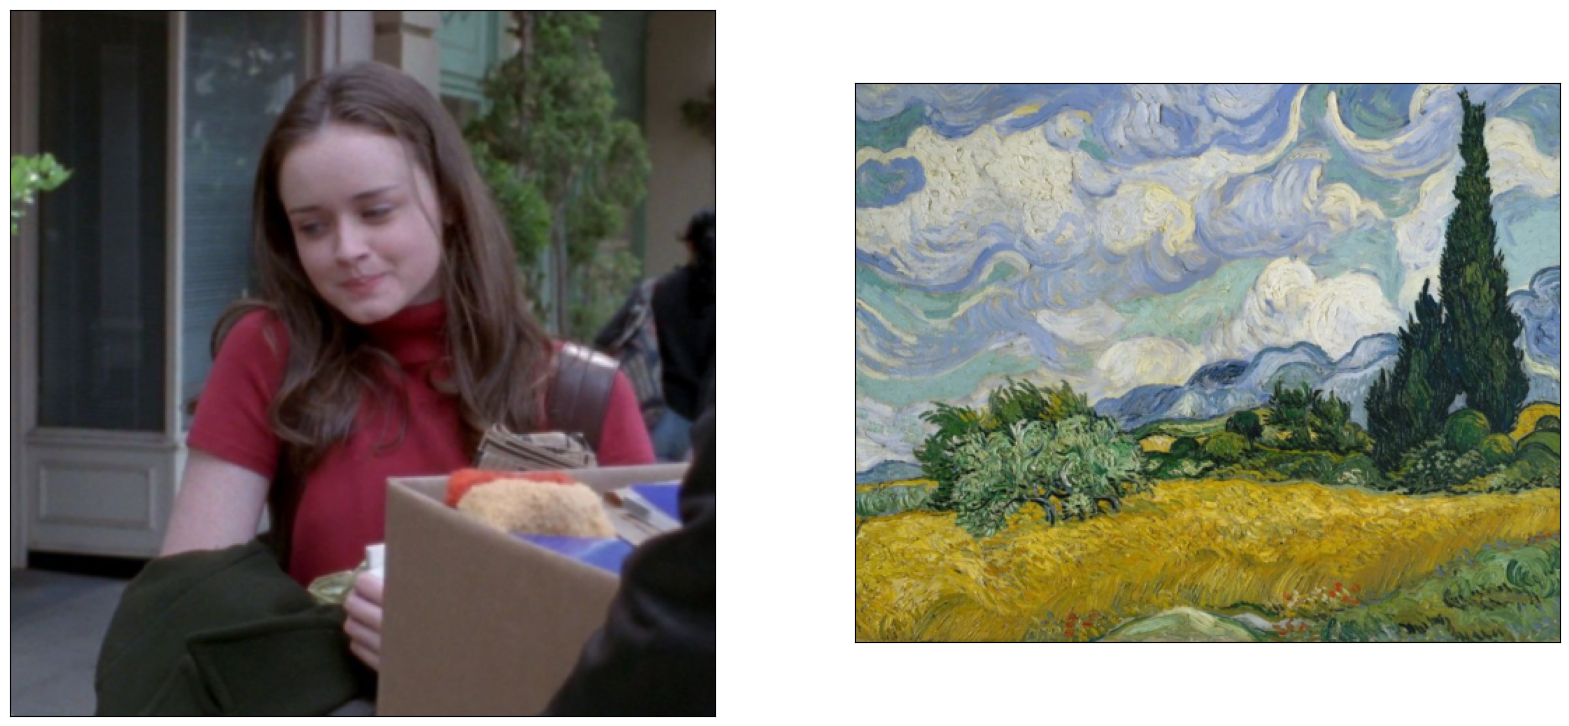

In [11]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1, xticks=[], yticks=[])
ax1.imshow(imconvert(content))
ax2 = fig.add_subplot(1,2,2, xticks=[], yticks=[])
ax2.imshow(imconvert(style))

In [12]:
# printing the vgg model
vgg

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [13]:
# defining the function to get layers

def get_features(image, model, layers=None):
    if layers is None:
        layers = {'0':'conv1_1','5':'conv2_1', '10':'conv3_1', '19':'conv4_1', '28':'conv5_1', '21':'conv4_2'}

    features = {}
    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]]=image

    return features

In [14]:
# calculating the gram matrix

def gram_matrix(tensor):
    batch_size, depth, height, width = tensor.shape

    tensor = tensor.view(depth, -1)
    tensor = torch.mm(tensor, tensor.t())
    return tensor


In [15]:
# extracting content and style features

style_features = get_features(style, vgg)
content_features = get_features(content, vgg)

style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

#we could start with random image, but it would be good to start with content image
target = content.clone().requires_grad_(True).to(device)

In [16]:
# content and style weights

style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.8,
                 'conv3_1': 0.5,
                 'conv4_1': 0.3,
                 'conv5_1': 0.1}


content_weight = 1  # alpha
style_weight = 5e6  # beta

Total Loss:  22131954.0
Total Loss:  21876356.0
Total Loss:  21595136.0
Total Loss:  21275152.0
Total Loss:  20935782.0
Total Loss:  20608938.0
Total Loss:  20284566.0
Total Loss:  19958252.0
Total Loss:  19629436.0
Total Loss:  19299866.0
Total Loss:  18972180.0
Total Loss:  18646886.0
Total Loss:  18325062.0
Total Loss:  18007048.0
Total Loss:  17693550.0
Total Loss:  17384762.0
Total Loss:  17080958.0
Total Loss:  16782254.0
Total Loss:  16489060.0
Total Loss:  16201617.0
Total Loss:  15919944.0
Total Loss:  15644029.0
Total Loss:  15373864.0
Total Loss:  15109605.0
Total Loss:  14851174.0
Total Loss:  14598430.0
Total Loss:  14351223.0
Total Loss:  14109618.0
Total Loss:  13873621.0
Total Loss:  13642970.0
Total Loss:  13417656.0
Total Loss:  13197670.0
Total Loss:  12982895.0
Total Loss:  12773227.0
Total Loss:  12568547.0
Total Loss:  12368781.0
Total Loss:  12173599.0
Total Loss:  11982914.0
Total Loss:  11796624.0
Total Loss:  11614672.0
Total Loss:  11436970.0
Total Loss:  112

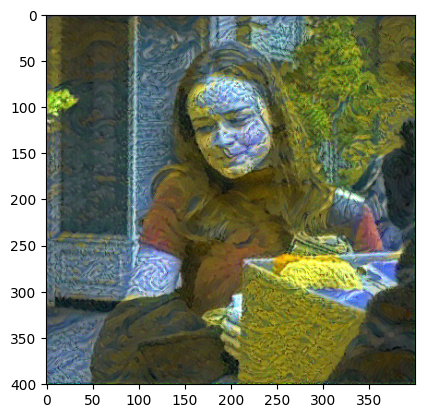

In [21]:
# this cell takes about 20 minutes to execute

# optimizing
optimizer = torch.optim.Adam([target], lr=0.003)

steps = 240
print_every = 4
for i in range(1,steps+1):

    target_features = get_features(target, vgg)
    content_loss = torch.mean((content_features['conv4_2']-target_features['conv4_2'])**2)

    style_loss = 0
    for layer in style_weights:

        target_feature = target_features[layer]

        _, d, h, w = target_feature.shape

        target_gram = gram_matrix(target_feature)

        style_gram = style_grams[layer]

        layer_style_loss = style_weights[layer]*torch.mean((target_gram - style_gram)**2)

        style_loss += layer_style_loss/ (d*h*w)

    total_loss = style_weight*style_loss + content_weight*content_loss

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    if i%print_every==0:
        print('Total Loss: ', total_loss.item())
        plt.imshow(imconvert(target))

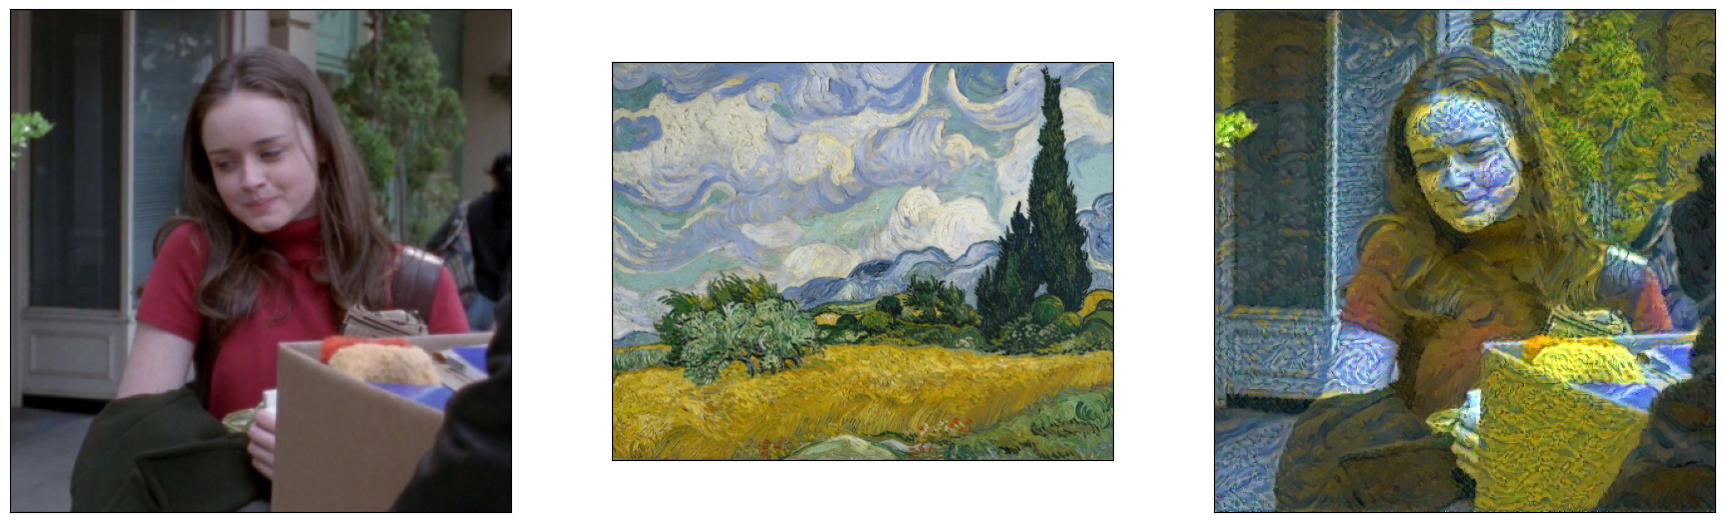

In [22]:
# comparing the blended image with the content and style image
fig = plt.figure(figsize=(22,10))
ax1 = fig.add_subplot(1,3,1, xticks=[], yticks=[])
ax1.imshow(imconvert(content))
ax2 = fig.add_subplot(1,3,2, xticks=[], yticks=[])
ax2.imshow(imconvert(style))

ax3 = fig.add_subplot(1,3,3, xticks=[], yticks=[])
ax3.imshow(imconvert(target))
